## Statistical Analysis of Sticker Occurrence Frequency

We have collected 1088 stickers, among which 1066 are base versions. Out of these, 566 stickers are distinct. We conducted a statistical analysis of the occurrence frequency of each sticker type and depicted it in a histogram, presented below:


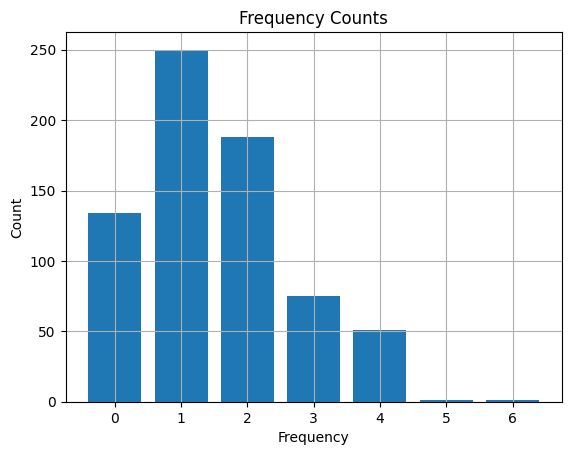

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import cramervonmises_2samp
import random
from collections import Counter
random.seed(40)

file_path_base_version = '/content/base_version.xlsx'
df_base_version = pd.read_excel(file_path_base_version)
frequency_counts = df_base_version['frequency'].value_counts()
plt.bar(frequency_counts.index, frequency_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Counts')
plt.grid()
plt.show()

## Random Sampling for Sticker Occurrence Frequency Analysis

Given that we have collected 1066 base version stickers, we aim to assess whether they exhibit a uniform distribution. To achieve this, we randomly sample 1066 stickers from a pool of 728 distinct sticker types. Following this random sampling, we conduct a statistical analysis of the occurrence frequency of each sticker type and present the results in the histogram below:


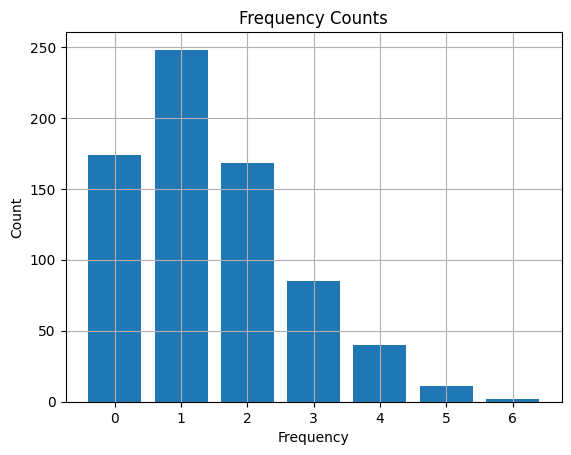

In [102]:
random_figurines = random.choices(range(728), k=1066)
figurine_counter = Counter(random_figurines)
all_figurines = pd.DataFrame({'Figurine': range(728)})
df_random = all_figurines.merge(pd.DataFrame(figurine_counter.items(), columns=['Figurine', 'Frequency']), on='Figurine', how='left')
df_random['Frequency'] = df_random['Frequency'].fillna(0).astype(int)
frequency_counts = df_random['Frequency'].value_counts()
plt.bar(frequency_counts.index, frequency_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Counts')
plt.grid()
plt.show()

## Comparison of Distribution and Cramér-von Mises Test Result

Based on the histogram we obtained from previous steps, we can observe that the distribution of the data we collected is quite similar to the distribution of data generated randomly, namely a uniform distribution.

Furthermore, we performed a Cramér-von Mises test, yielding a p-value of 0.1078. This value suggests that we should not reject the hypothesis that the distributions of the collected data and the randomly generated data are different.


In [24]:
pip install scipy

In [103]:
# Perform Cramér-von Mises test
result = cramervonmises_2samp(df_random['Frequency'],df_base_version['frequency'])
# Print results
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")


Statistic: 0.33538583382070897, p-value: 0.10782464038918882


## Sticker Collection Simulation

In order to simulate the process of collecting stickers, we randomly sample stickers until a desired number of distinct stickers is collected, and then repeat this process to obtain average results. After simulating this process 10,000 times, we observe that to fill the entire album, we need 872 packs. If we aim to fill only half of the album, which is 364 stickers, we need to purchase 84 packs. Additionally, to acquire the 728th sticker, we need to purchase an extra 124 packs.


In [88]:
def simulate_purchases(num_stickers, stickers_per_pack=6, num_simulations=1):
    if num_stickers > 728:
        num_stickers = 728
    total_packs = sum(_simulate_single_purchase(num_stickers, stickers_per_pack) for _ in range(num_simulations))
    average_packs = total_packs / num_simulations
    return average_packs

def _simulate_single_purchase(num_stickers, stickers_per_pack=6):
    stickers_collected = set()
    num_packs = 0
    while len(stickers_collected) < num_stickers:
        pack = random.choices(range(1, 729), k=stickers_per_pack)
        stickers_collected.update(pack)
        num_packs += 1
    return num_packs

def sticker_curve(num_stickers, stickers_per_pack=6):
    y = simulate_purchases(num_stickers, stickers_per_pack, num_simulations=10000)
    return y

# Trying to plot the curve
y_values = range(1,729)
x_values = [sticker_curve(num_stickers) for num_stickers in y_values]


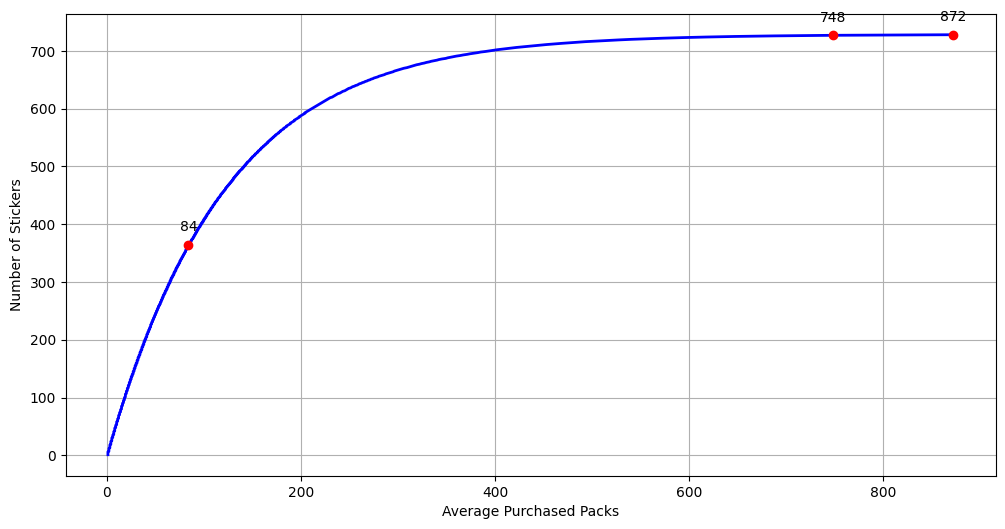

In [98]:
x_values = [round(i) for i in x_values]
# Identifying indices of specific y values
indices = [i for i, y in enumerate(y_values) if y in [728, 727, 364]]

# Extracting corresponding x and y values for highlighting
highlight_x = [x_values[i] for i in indices]
highlight_y = [y_values[i] for i in indices]

# Plotting the curve with highlighted points
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, color='blue', lw=2)
plt.scatter(highlight_x, highlight_y, color='red', zorder=5)  # Highlighting in red

# Labeling the highlighted points
plt.xlabel('Average Purchased Packs')
plt.ylabel('Number of Stickers')

for x, y in zip(highlight_x, highlight_y):
    plt.annotate(f'{x}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()


## Sticker Collaboration Analysis

This code simulates the process of purchasing stickers until at least two copies of each sticker are obtained and calculates the average number of CHF required to achieve this goal. Additionally, it conducts simulations for collaborations involving 2, 3, and 4 people. The results show that for collaborations, each person needs an average of 563 CHF for a group of 2, 464 CHF for a group of 3, and 405 CHF for a group of 4.


In [107]:
t1 = x_values[-1]
print(t1)

872


In [45]:
import random
from collections import defaultdict

def _simulate_single_purchase_second(num_stickers, stickers_per_pack=6):
    stickers_collected = defaultdict(int)
    num_packs = 0
    initial_stickers = list(range(1, 729))
    while min(stickers_collected.values(), default=0) < 2:
        pack = random.choices(initial_stickers, k=stickers_per_pack)
        for sticker in pack:
            stickers_collected[sticker] += 1
        num_packs += 1
    return num_packs
def simulate_purchases_second(num_stickers, stickers_per_pack=6, num_simulations=1):
    if num_stickers > 728:
        num_stickers = 728
    total_packs = sum(_simulate_single_purchase_second(num_stickers, stickers_per_pack) for _ in range(num_simulations))
    average_packs = total_packs / num_simulations
    return average_packs

def sticker_curve_second(num_stickers, stickers_per_pack=6):
    y = simulate_purchases_second(num_stickers, stickers_per_pack, num_simulations=10000)
    return y
# 测试代码
t2=sticker_curve_second(728)
print(t2)


1124.4666


In [46]:
import random
from collections import defaultdict

def _simulate_single_purchase_third(num_stickers, stickers_per_pack=6):
    stickers_collected = defaultdict(int)
    num_packs = 0
    initial_stickers = list(range(1, 729))
    while min(stickers_collected.values(), default=0) < 3:
        pack = random.choices(initial_stickers, k=stickers_per_pack)
        for sticker in pack:
            stickers_collected[sticker] += 1
        num_packs += 1
    return num_packs
def simulate_purchases_third(num_stickers, stickers_per_pack=6, num_simulations=1):
    if num_stickers > 728:
        num_stickers = 728
    total_packs = sum(_simulate_single_purchase_third(num_stickers, stickers_per_pack) for _ in range(num_simulations))
    average_packs = total_packs / num_simulations
    return average_packs

def sticker_curve_third(num_stickers, stickers_per_pack=6):
    y = simulate_purchases_third(num_stickers, stickers_per_pack, num_simulations=10000)
    return y
# 测试代码
t3=sticker_curve_third(728)
print(t3)


1390.5541


In [48]:
import random
from collections import defaultdict

def _simulate_single_purchase_fourth(num_stickers, stickers_per_pack=6):
    stickers_collected = defaultdict(int)
    num_packs = 0
    initial_stickers = list(range(1, 729))
    while min(stickers_collected.values(), default=0) < 4:
        pack = random.choices(initial_stickers, k=stickers_per_pack)
        for sticker in pack:
            stickers_collected[sticker] += 1
        num_packs += 1
    return num_packs
def simulate_purchases_fourth(num_stickers, stickers_per_pack=6, num_simulations=1):
    if num_stickers > 728:
        num_stickers = 728
    total_packs = sum(_simulate_single_purchase_fourth(num_stickers, stickers_per_pack) for _ in range(num_simulations))
    average_packs = total_packs / num_simulations
    return average_packs

def sticker_curve_fourth(num_stickers, stickers_per_pack=6):
    y = simulate_purchases_fourth(num_stickers, stickers_per_pack, num_simulations=10000)
    return y
# 测试代码
t4=sticker_curve_fourth(728)
print(t4)


1616.2194


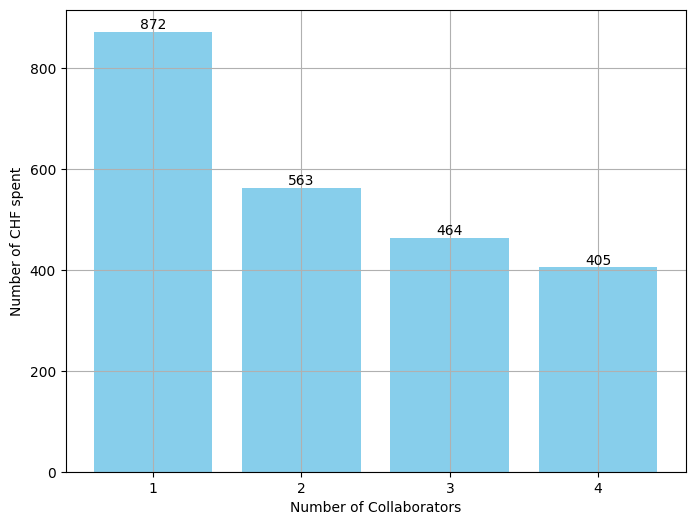

In [109]:
# Data
collaborators = [1, 2, 3, 4]
values = [t1, t2/2, t3/3,t4/4]

# Round up the number of packs to the nearest integer
values = [math.ceil(value) for value in values]

# Create plot
plt.figure(figsize=(8, 6))
bars = plt.bar(collaborators, values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Collaborators')
plt.ylabel('Number of CHF spent')

# Set x-axis ticks to only show 1, 2, and 3
plt.xticks(collaborators)

# Add grid
plt.grid(True)

# Add text labels on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Show plot
plt.show()


## Sticker Frequency Distribution Analysis

We generate random collections of stickers with varying quantities and analyze the frequency distribution of sticker counts. The purpose is to visually understand how often different quantities of stickers occur in the collections.


In [50]:
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
random_figurines_k1 = random.choices(range(728), k=728)
random_figurines_k2 = random.choices(range(728), k=728*5)
random_figurines_k3 = random.choices(range(728), k=728*10)
random_figurines_k4 = random.choices(range(728), k=728*5000)

figurine_counter_k1= Counter(random_figurines_k1)
figurine_counter_k2= Counter(random_figurines_k2)
figurine_counter_k3= Counter(random_figurines_k3)
figurine_counter_k4= Counter(random_figurines_k4)



In [51]:
frequency_counter_k1 = Counter(figurine_counter_k1.values())
frequency_counter_k2 = Counter(figurine_counter_k2.values())
frequency_counter_k3 = Counter(figurine_counter_k3.values())
frequency_counter_k4 = Counter(figurine_counter_k4.values())


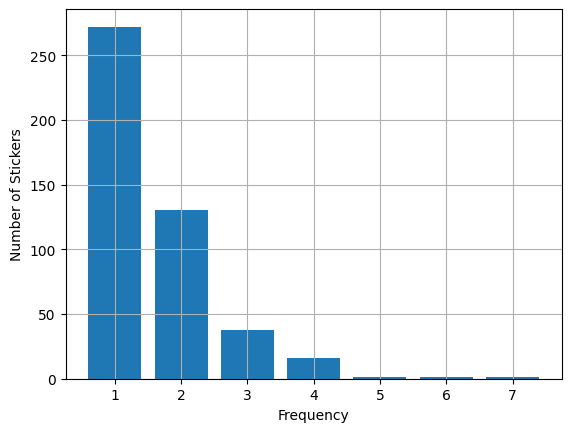

In [52]:
plt.bar(frequency_counter_k1.keys(), frequency_counter_k1.values())

plt.xlabel('Frequency')
plt.ylabel('Number of Stickers')

plt.grid()
plt.show()

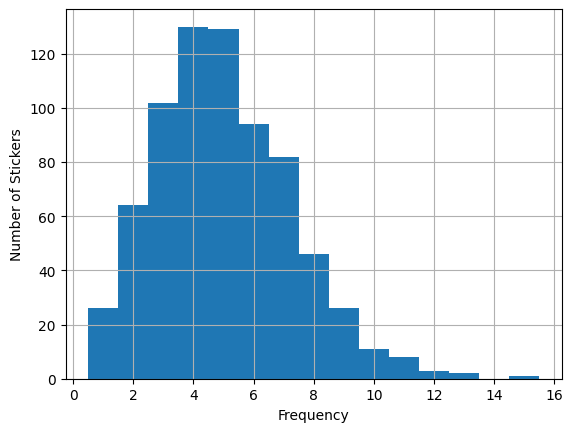

In [66]:

binned_data = {}
for k, v in frequency_counter_k2.items():
    bin = 1 * (k // 1)
    if bin in binned_data:
        binned_data[bin] += v
    else:
        binned_data[bin] = v

plt.bar(binned_data.keys(), binned_data.values(), width=1)

plt.xlabel('Frequency')
plt.ylabel('Number of Stickers')

plt.grid()
plt.show()


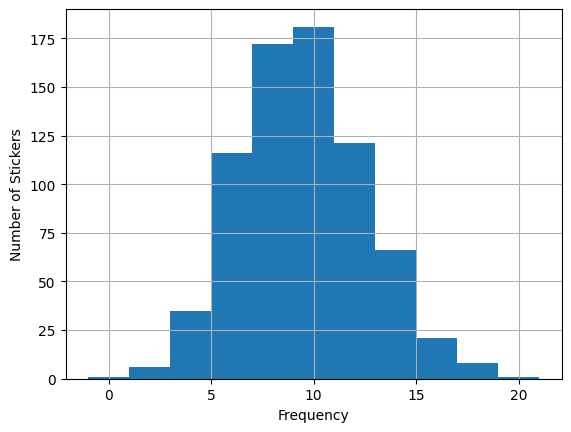

In [69]:

binned_data = {}
for k, v in frequency_counter_k3.items():
    bin = 2 * (k // 2)
    if bin in binned_data:
        binned_data[bin] += v
    else:
        binned_data[bin] = v

plt.bar(binned_data.keys(), binned_data.values(), width=2)


plt.xlabel('Frequency')
plt.ylabel('Number of Stickers')


plt.grid()
plt.show()


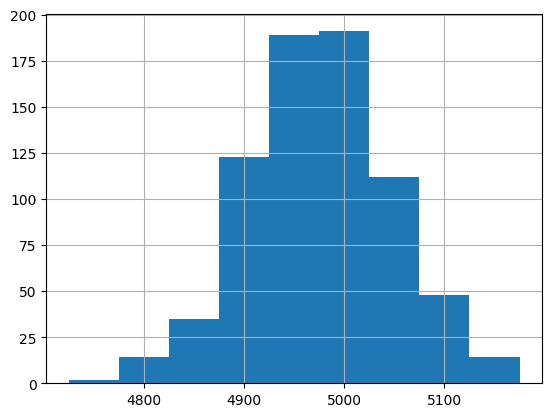

In [71]:

binned_data = {}
for k, v in frequency_counter_k4.items():
    bin = 50 * (k // 50)
    if bin in binned_data:
        binned_data[bin] += v
    else:
        binned_data[bin] = v


plt.bar(binned_data.keys(), binned_data.values(), width=50)


plt.xlabel('Frequency')
plt.ylabel('Number of Stickers')


plt.grid()
plt.show()
